📈 R² score voor regressie: 0.919
🌳 Decision Tree Accuracy: 0.933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



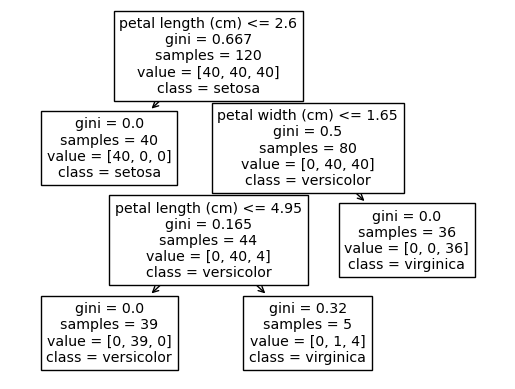

/Users/youneselazzouzi/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


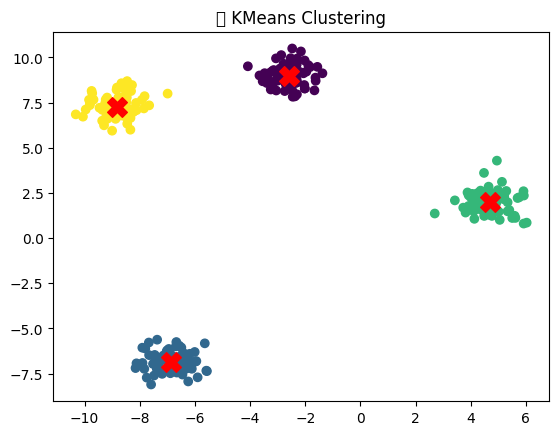

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000          6.30    66.40%    33.00%     0:00:01     0:00:00

🔴 Beste oplossing Rastrigin: [ 0.07016829 -0.00212065]
🔴 Energy (doelfunctie): 0.962


In [1]:
# 📦 Libraries importeren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris, make_blobs
from simanneal import Annealer  # pip install simanneal

# 📘 Dataset laden
iris = load_iris(as_frame=True)
df = iris.frame

# --------------------
# 🔷 1. REGRESSIE
# --------------------
# Doel: petal_length voorspellen op basis van petal_width
X = df[['petal width (cm)']]
y = df['petal length (cm)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Regressiemodel maken en trainen
reg = LinearRegression()
reg.fit(X_train, y_train)

# Voorspellen en evalueren
y_pred = reg.predict(X_test)
print(f"📈 R² score voor regressie: {r2_score(y_test, y_pred):.3f}")

# --------------------
# 🔶 2. CLASSIFICATIE
# --------------------
# Doel: soort bloem voorspellen (classification)
Xc = df.drop(columns='target')
yc = df['target']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, stratify=yc, train_size=0.8)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(Xc_train, yc_train)

yc_pred = tree.predict(Xc_test)
print(f"🌳 Decision Tree Accuracy: {accuracy_score(yc_test, yc_pred):.3f}")
print(classification_report(yc_test, yc_pred))

# Boom plotten
plot_tree(tree, feature_names=Xc.columns, class_names=iris.target_names)
plt.show()

# --------------------
# 🔵 3. CLUSTERING
# --------------------
# Doel: ongekende groepen vinden met KMeans
X_blob, y_blob = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_blob)

# Clusters visualiseren
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title("🔵 KMeans Clustering")
plt.show()

# --------------------
# 🔴 4. METAHEURISTIEK – SIMULATED ANNEALING
# --------------------
# Doel: Rastrigin functie minimaliseren met Simulated Annealing

class RastriginProblem(Annealer):
    def move(self):
        # kleine verandering aan 1 van de 2 variabelen
        i = np.random.randint(0, 2)
        self.state[i] += np.random.normal(0, 0.1)
        self.state[i] = np.clip(self.state[i], -5.12, 5.12)

    def energy(self):
        # Rastrigin costfunctie
        x, y = self.state
        return 20 + x**2 - 10 * math.cos(2 * math.pi * x) + y**2 - 10 * math.cos(2 * math.pi * y)

# Startpositie willekeurig
init_state = np.random.uniform(-5.12, 5.12, size=2)
rastrigin = RastriginProblem(init_state)
best_state, best_energy = rastrigin.anneal()

print(f"🔴 Beste oplossing Rastrigin: {best_state}")
print(f"🔴 Energy (doelfunctie): {best_energy:.3f}")
